In [1]:
import pandas as pd
from textblob import TextBlob
import os
import nltk
import re
from collections import Counter

import matplotlib.pyplot as plt
import string
import preprocessor as p
from nltk.corpus import stopwords
from nltk import word_tokenize

In [2]:
import glob
df_swiggy = pd.DataFrame()
for file_name in glob.glob("swiggy/"+'*.csv'):
    df = pd.read_csv(file_name)
    df_swiggy = df_swiggy.append(df)

In [10]:
swiggy = '\n'.join(df_swiggy['full_text'])
swiggy = swiggy + '\n'
text_file = open("swiggy.txt", "w")
text_file.write(swiggy)
text_file.close()

In [11]:
df_zomato = pd.DataFrame()
for file_name in glob.glob("zomato/"+'*.csv'):
    df = pd.read_csv(file_name)
    df_zomato = df_zomato.append(df)
    
zomato = '\n'.join(df_zomato['full_text'])
zomato = zomato + '\n'
text_file = open("zomato.txt", "w")
text_file.write(zomato)
text_file.close()

In [3]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [4]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#combine sad and happy emoticons

emoticons = emoticons_happy.union(emoticons_sad)

In [5]:
df_swiggy['full_text'].head(20)

0     RT @DhooDala: I craved for an Ice Creame this ...
1     @SwiggyCares hi team.. is there any way  possi...
2     @SwiggyCares Please Start the service for Morn...
3     RT @swiggy_in: When hunger takes over, time is...
4     Again I am telling you, if there would be no c...
5     Coming to prob: From a shitty restaurant "BS G...
6     RT @abhithei: @SwiggyCares your estimated deli...
7     @SwiggyCares No compensations will be provided...
8     @KTRTRS @swiggy_in @SwiggyCares \nYenti sir va...
9     @SwiggyCares What do you do with you so called...
10    @KTRTRS @swiggy_in @SwiggyCares \nDelivery boy...
11    @SwiggyCares And yes, your so called customer ...
12    Hello @KTRTRS sir,\nI usually don't use Twitte...
13    @SwiggyCares No, talk to replies only. I don't...
14    @swiggy_in Your T&amp;C says that u can't shar...
15    You think customer is a donkey or what are you...
16    @WeAreRanchi @swiggy_in @SwiggyCares सबसे घटिय...
17    @SwiggyCares You're not doing any favor to

In [6]:
#https://towardsdatascience.com/with-the-emergence-of-social-media-high-quality-of-structured-and-unstructured-information-shared-b16103f8bb2e
#https://pypi.org/project/tweet-preprocessor/
import preprocessor as p
def clean_tweets_preprocessing(text) :
    #print(text)
#      text = BeautifulSoup(text, 'lxml')
#      print(text)
#     text = re.sub("http[^[:space:]]*", "", text)   #remove mentions
#     text = re.sub("[^[:alpha:][:space:]]*", "", text)        #remove URLs
#     text = re.sub("@[^[:space:]]*", "", text)
    text = p.clean(text)
    print(text)
    return text
    

In [7]:
def clean_tweets(tweet):
    stop_words = set(stopwords.words('english'))
    stop_words_list = list(stop_words)
    stop_words_list.extend(['Humans','May', 'Water', 'may', 'water', 'definitely', 'nice', 'Zomato', 'Order','order','swiggy','food','guy','time'])

    #after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    tweet = tweet.lower()
    
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

    #remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)

    word_tokens = word_tokenize(tweet)
    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words_list]
    filtered_tweet = []

    #looping through conditions
    for w in word_tokens:
    #check tokens against stop words , emoticons and punctuations
        if w not in stop_words_list and w not in emoticons and w not in string.punctuation:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)return tweet

In [8]:
df['full_text'] = df['full_text'].apply(lambda x: clean_tweets_preprocessing(x))
df['full_text'] = df['full_text'].apply(lambda x: clean_tweets(x))

I would like to bring to your notice that swiggy food delivery guys drive their vehicle too rash and dont care what damage or loss others would suffer. I myself had encountered to such incidences and was lucky to be safe. Revert awaited.
You guys sucks
I don't find my card I had my card on the account.
Just replied again with the correct order id
I have just sent you a DM
cont'd... When I speak via chat to customer support, I am shocked at the lack of ownership by Swiggy by citing Dominos is just their partner.
I placed an order for Dominos via the app. Order . I was called by the Dominos executive informing that they are cancelling the order because they don't deliver to my area. Now Swiggy shows that the order has been delivered but that is not true.
Thank you for your support and good service. Finally I got to know why swiggy is A $DOLAR
: Hi Sunny! We are sorry for the unpleasant eerience. Please DM the registered details and we will help so…
/5 on by chaitanyajayanthi : Worst-Serv

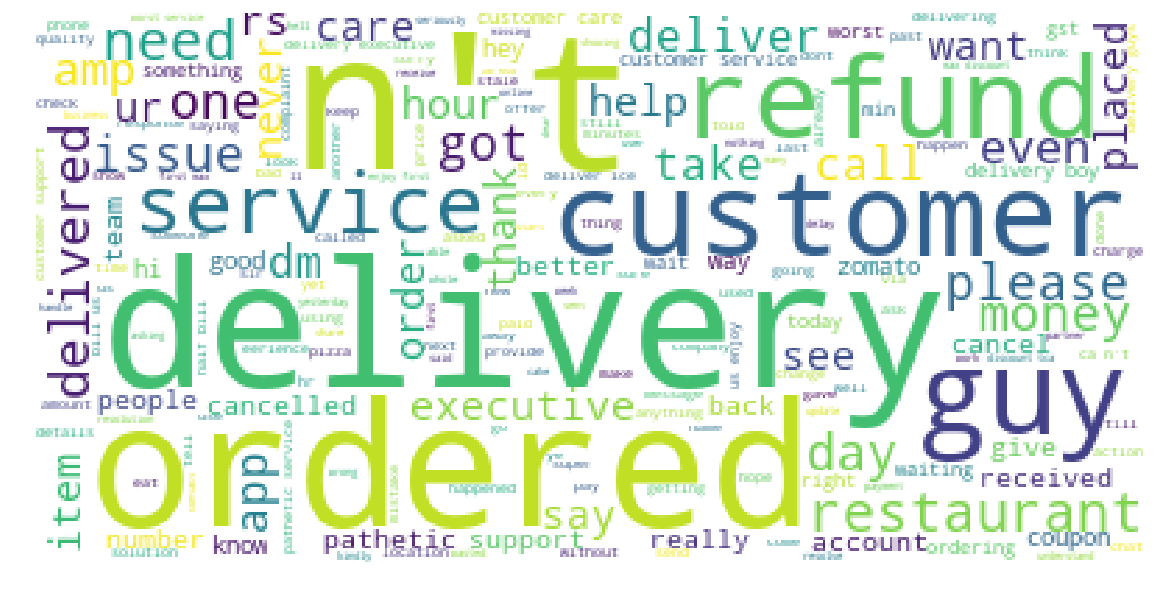

In [9]:
text_corpus = '.'.join(df['full_text'])
from wordcloud import WordCloud
cloud = WordCloud(background_color="white").generate(text_corpus)

plt.figure(figsize=(20,20))
plt.imshow(cloud)

plt.axis('off')
plt.show()

In [10]:
#https://medium.com/@yhpf/sentiment-analysis-with-textblob-af2da55ccc9
def sentiment_func(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None


In [11]:
df['tweet_polarity'] = df['full_text'].apply(sentiment_func)
df['Polarity'] = df['tweet_polarity'].apply(lambda x: x[0])
df['Subjectivity'] = df['tweet_polarity'].apply(lambda x: x[1])

In [12]:
df[['full_text','tweet_polarity','Polarity','Subjectivity']].head(50)

,full_text,tweet_polarity,Polarity,Subjectivity
0,would like bring notice delivery guys drive ve...,"(0.41666666666666663, 0.6666666666666667)",0.416667,0.666667
1,guys sucks,"(-0.3, 0.3)",-0.300000,0.300000
2,n't find card card account,"(0.0, 0.0)",0.000000,0.000000
3,replied correct id,"(0.0, 0.0)",0.000000,0.000000
4,sent dm,"(0.0, 0.0)",0.000000,0.000000
5,cont 'd ... speak via chat customer support sh...,"(-0.7, 0.8)",-0.700000,0.800000
6,placed dominos via app called dominos executiv...,"(0.35, 0.65)",0.350000,0.650000
7,thank support good service finally got know dolar,"(0.35, 0.8)",0.350000,0.800000
8,hi sunny sorry unpleasant eerience please dm r...,"(-0.575, 0.975)",-0.575000,0.975000
9,/5 chaitanyajayanthi worst-service,"(0.0, 0.0)",0.000000,0.000000


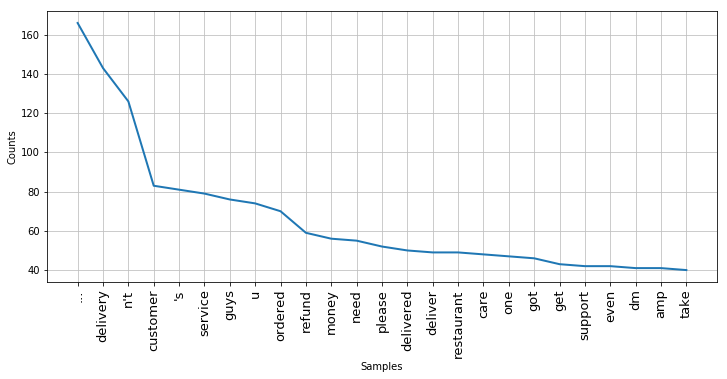

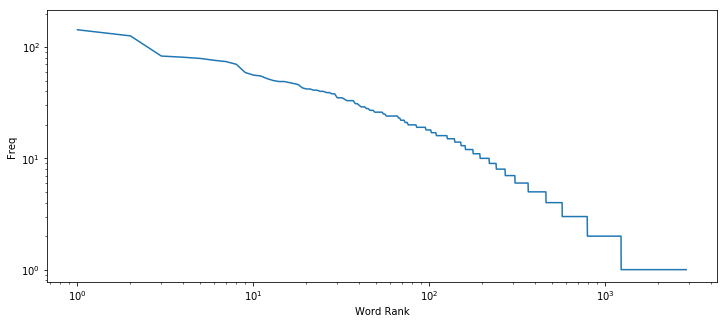

In [19]:
#https://towardsdatascience.com/almost-real-time-twitter-sentiment-analysis-with-tweep-vader-f88ed5b93b1c
# most common words in twitter dataset
all_words = []
for line in list(df['full_text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [ ]:
#https://towardsdatascience.com/almost-real-time-twitter-sentiment-analysis-with-tweep-vader-f88ed5b93b1c
#https://towardsdatascience.com/@rickykim78

In [ ]:
```{r text.clean}
 text.clean = function(text,                    # x=text_corpus
		remove_numbers=TRUE, 	    # whether to drop numbers? Default is TRUE	
		remove_stopwords=TRUE)	    # whether to drop stopwords? Default is TRUE

 { text = gsub("@[A-Za-z0-9_]+", '', text)  #remove all @mention
  text = gsub("https?://[A-Za-z0-9./]+", "", text)   #remove links
  text = iconv(text, "latin1", "ASCII", sub="")  #remove other language characters
  text = gsub("[^a-zA-Z\\s]", " ", text)  #remove all #, numbers, etc non alphabets
  text = gsub(' +', ' ', text) #all double spaces with single
  text = gsub("[^[:alnum:]]", " ", text)  #remove non alpha numeric
  text = tolower(text)  # convert to lower case characters
  text = stripWhitespace(text)   #remove extra white spaces
  text = gsub("^\\s+|\\s+$", "", text)   #remove extra spaces at beginning and end
  

  english_stopwords = tm::stopwords('english')
  #external_stopwords = readLines('stopwords/twitter-stopwords.txt')
  #common  = unique(c(english_stopwords, external_stopwords))  #combine two lists
  #stopwords = unique(gsub("'"," ",common))  #final list

  text = removeWords(text,english_stopwords) #remove all stopwords
  text = stripWhitespace(text)
  #do stemming later

  return(text) 
 }